## Instagram Reach Analysis

In this project, I want to find out the relationship between 'likes', 'comments', 'impressions', 'follows', etc of a particular Instagram accoount to help understand how the Instagram algorithm works.

I have been provided datasets from [here](https://thecleverprogrammer.com/2022/03/22/instagram-reach-analysis-using-python/)

In [102]:
from csv import reader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

Instagram = pd.read_csv('Instagram.csv')

# METHOD OF OPERATION

- CHECKING FOR THE PERCENTAGE IMPRESSION GOTTEN FROM EACH SOURCE
- Relationship between likes and impression
- Relationship between comments and total impression
- Relationship between shares and total impression
- Relationship between saves and total impression
- Correlation of all the columns with the Impressions column
- Conversion rate of profile visits to number of follows
- Relationship between the total profile visits and the number of followers gained from all profile visits
- Content and Hashtags analysis

In [110]:
print(Instagram.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

## Checking For Null Values

In [108]:
Instagram.isnull().sum() # checking for null values

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

## Checking For Data Type

In [104]:
Instagram.info() # checking for data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


## CHECKING FOR THE PERCENTAGE IMPRESSION GOTTEN FROM EACH SOURCE

In [48]:
home = Instagram["From Home"].sum()
hashtags = Instagram["From Hashtags"].sum()
explore = Instagram["From Explore"].sum()
other = Instagram["From Other"].sum()

In [95]:
categories = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
values = [home, hashtags, explore, other]

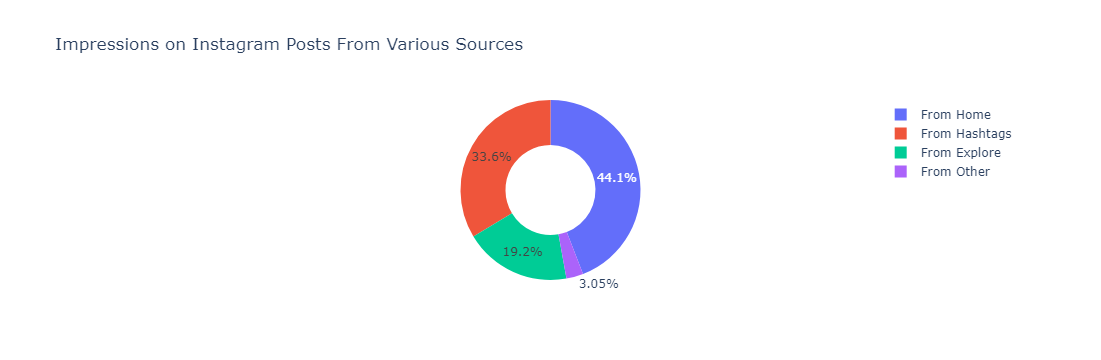

In [97]:
fig = px.pie(Instagram, values=values, names=categories, title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

This shows that in total, Posts from home which is largely engaged by followers garner the most impressions, followed by posts from hashtags

# Relationship between `likes` and `impression`

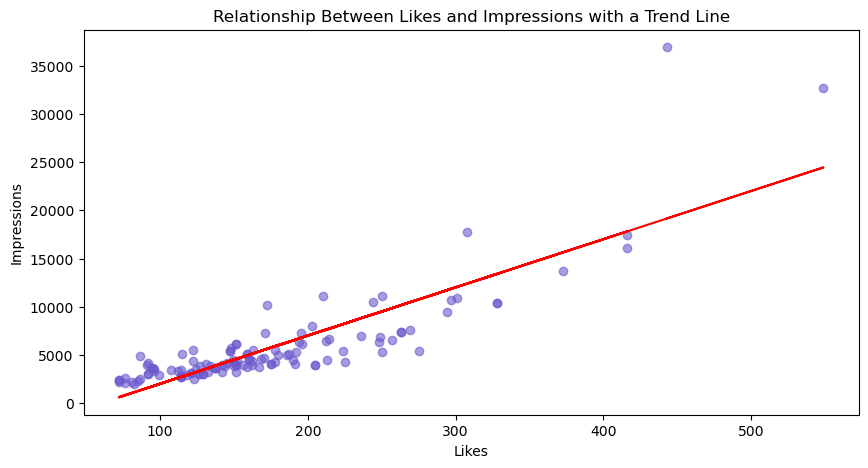

In [53]:
plt.figure(figsize = (10,5))
plt.scatter(Instagram['Likes'], Instagram['Impressions'], color = 'slateblue', alpha = 0.6, marker = 'o')
plt.title("Relationship Between Likes and Impressions with a Trend Line")
plt.xlabel('Likes')
plt.ylabel('Impressions')

z = np.polyfit(Instagram['Likes'], Instagram['Impressions'], 1)  # Fit a line (degree 1)
p = np.poly1d(z)                     # Create a polynomial from the coefficients
plt.plot(Instagram['Likes'], p(Instagram['Likes']), color='red', label='Trendline')  # Plot the trendline

This plot shows a linear relationshsip between `Impressions` and `Likes`

## Relationship between `Comments` and `Total Impression`

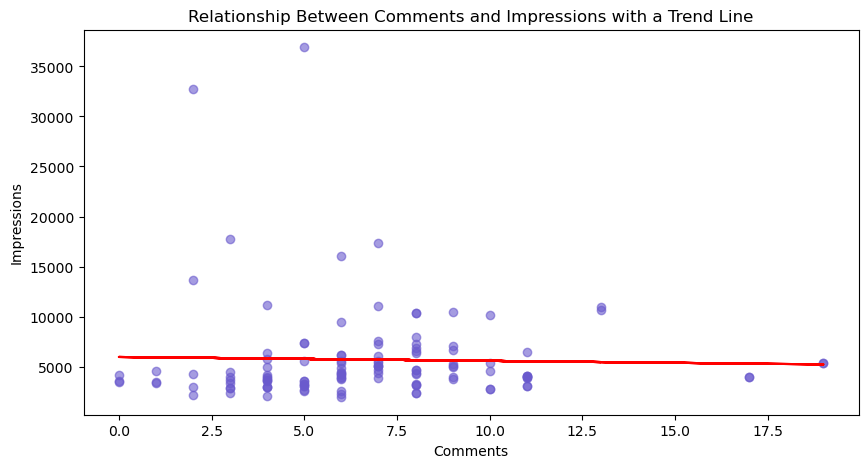

In [56]:
plt.figure(figsize = (10,5))
plt.scatter(Instagram['Comments'], Instagram['Impressions'], color = 'slateblue', alpha = 0.6, marker = 'o')
plt.title("Relationship Between Comments and Impressions with a Trend Line")
plt.xlabel('Comments')
plt.ylabel('Impressions')

z = np.polyfit(Instagram['Comments'], Instagram['Impressions'], 1)  # Fit a line (degree 1)
p = np.poly1d(z)                     # Create a polynomial from the coefficients
plt.plot(Instagram['Comments'], p(Instagram['Comments']), color='red', label='Trendline')  # Plot the trendline

Total number of `Comments` does not seem to have any effect on the `Impressions` count

## Relationship between `Shares` and `Total Impression`

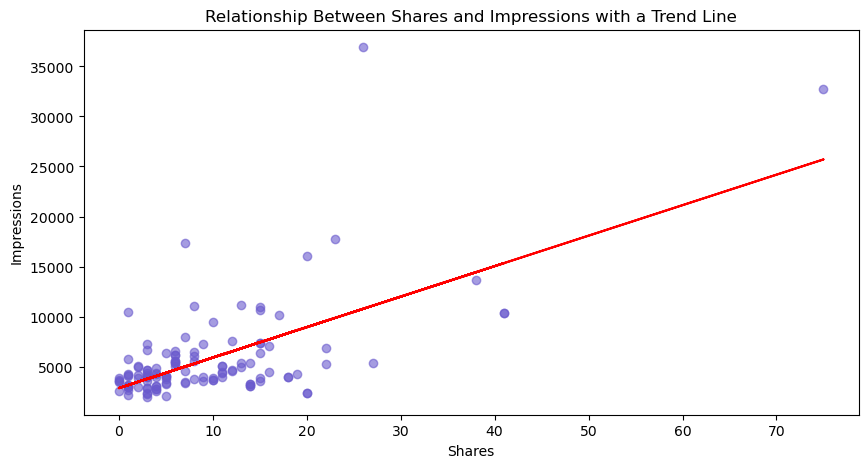

In [59]:
plt.figure(figsize = (10,5))
plt.scatter(Instagram['Shares'], Instagram['Impressions'], color = 'slateblue', alpha = 0.6, marker = 'o')
plt.title("Relationship Between Shares and Impressions with a Trend Line")
plt.xlabel('Shares')
plt.ylabel('Impressions')

z = np.polyfit(Instagram['Shares'], Instagram['Impressions'], 1)  # Fit a line (degree 1)
p = np.poly1d(z)                     # Create a polynomial from the coefficients
plt.plot(Instagram['Shares'], p(Instagram['Shares']), color='red', label='Trendline')  # Plot the trendline

A higher number of shares will result in a higher reach

## Relationship between `Saves` and `Total Impression`

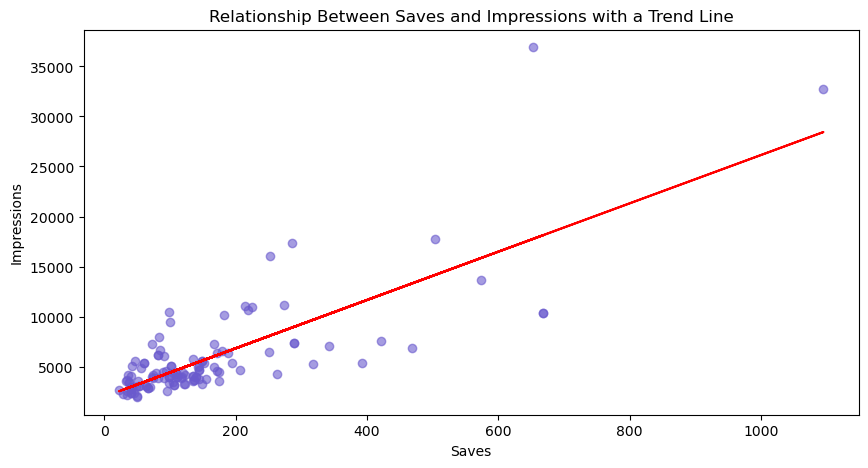

In [62]:
plt.figure(figsize = (10,5))
plt.scatter(Instagram['Saves'], Instagram['Impressions'], color = 'slateblue', alpha = 0.6, marker = 'o')
plt.title("Relationship Between Saves and Impressions with a Trend Line")
plt.xlabel('Saves')
plt.ylabel('Impressions')

z = np.polyfit(Instagram['Saves'], Instagram['Impressions'], 1)  # Fit a line (degree 1)
p = np.poly1d(z)                     # Create a polynomial from the coefficients
plt.plot(Instagram['Saves'], p(Instagram['Saves']), color='red', label='Trendline')  # Plot the trendline

There is also a linear relationship between the number of times a post is saved and the impressions it garners

## Correlation of all the columns with the Impressions column

In [106]:
Instagram_num = Instagram.drop(columns=['Caption', 'Hashtags']) # dropping columns with none numeric characters

In [66]:
correlation = Instagram_num.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


## Creating a Heat Map

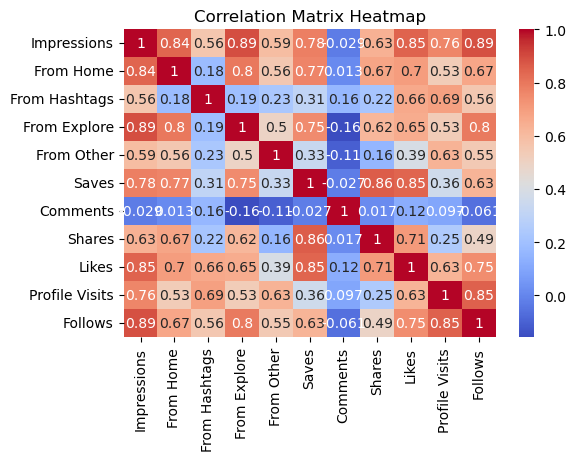

In [68]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Conversion Rate of Profile Visits to Number of Follows

In [70]:
Profile_visits = Instagram["Profile Visits"].sum()
Follows = Instagram["Follows"]. sum()

In [71]:
Conversion_Rate = (Follows/Profile_visits) * 100
print(Conversion_Rate)

41.00265604249668


This shows a conversion rate of 41% on the Instagram account. I.e 41% of the people who visit the account profile do end up following, which is a great conversion rate

## Relationship between the total profile visits and the number of followers gained from all profile visits

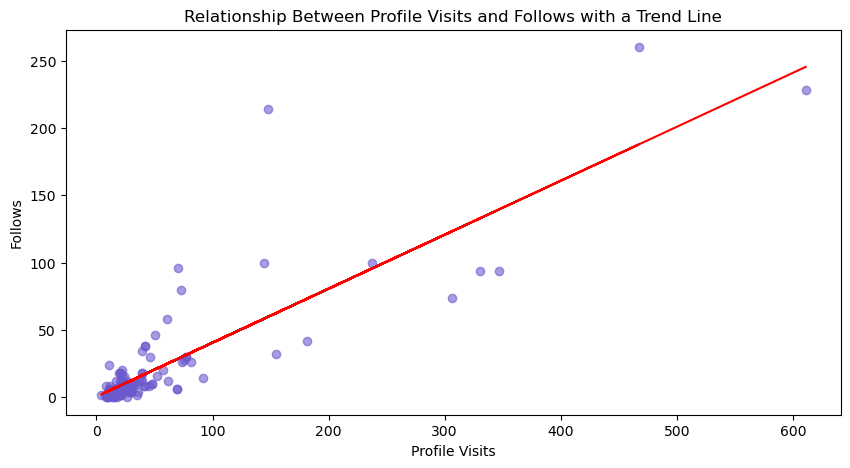

In [74]:
plt.figure(figsize = (10,5))
plt.scatter(Instagram['Profile Visits'], Instagram['Follows'], color = 'slateblue', alpha = 0.6, marker = 'o')
plt.title("Relationship Between Profile Visits and Follows with a Trend Line")
plt.xlabel('Profile Visits')
plt.ylabel('Follows')

z = np.polyfit(Instagram['Profile Visits'], Instagram['Follows'], 1)  # Fit a line (degree 1)
p = np.poly1d(z)                     # Create a polynomial from the coefficients
plt.plot(Instagram['Profile Visits'], p(Instagram['Profile Visits']), color='red', label='Trendline')  # Plot the trendline

The relationship between profile visits and followers gained is also linear.

## Analyzing Content

The dataset has two columns, namely caption and hashtags, which will help understand the kind of content that is being posted on Instagram page.s:

I will create a wordcloud of the caption column to look at the most used words in the caption of the Instagram posts:

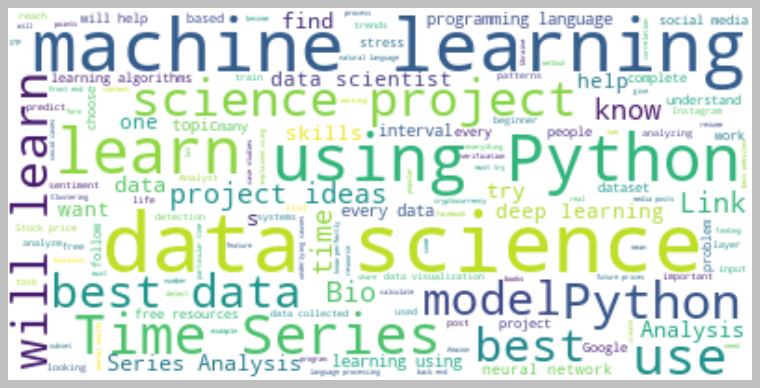

In [114]:
text = " ".join(i for i in Instagram.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

I will create a wordcloud of the hashtags column to look at the most used hashtags of the Instagram posts:

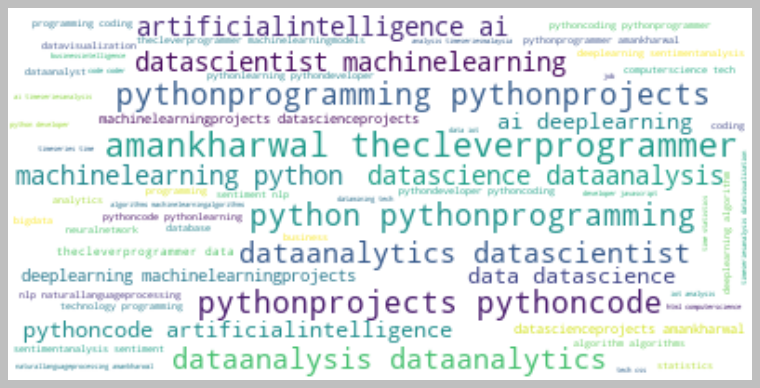

In [118]:
text = " ".join(i for i in Instagram.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## CONCLUSION
From the analysis above, it was observed that the most popular source of posts is the homepage. Additionally, the use of hashtags helps improve the reach of posts. It was also observed that Likes positively impact both Impressions and reach, as Impressions increased with the number of Likes, as shown in the illustration above. Shares and Saves also positively impact Impressions. Comments, however, do not seem to affect the reach of posts. Furthermore, 41 out of every 100 people who visit the account profile end up following the account, and the number of Follows increases with Profile visits